<a href="https://colab.research.google.com/github/andysontran/2-CHL5230-F23/blob/main/2_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Clone files on repository to Drive
!git clone https://github.com/andysontran/2-CHL5230-F23.git

# Set working directory
%cd 2-CHL5230-F23/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into '2-CHL5230-F23'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 38 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (38/38), 1.05 MiB | 5.31 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23


In [ ]:
# Read CSV file into Pandas df
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


**Dataframe characteristics:**

*   1465 rows, 12 columns
*   Columns: age (range: 14-73), gender (1-2), air pollution (1-8), alcohol usage (1-8), genetic risk (1-7), lung disease (1-7), obesity (1-7), smoking (1-8), passive smoker (1-8), chest pain (1-9), coughing of blood (1-9), severity (0-3)
*   Missing values = 0



In [ ]:
# Get shape of df
print(df.shape)

(1465, 12)


In [ ]:
# List columns of df
print(df.columns)

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol Usage', 'Genetic Risk',
       'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Severity'],
      dtype='object')


In [ ]:
# Display summary statistics
print(df.describe())

               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     1.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     1.000000       1.000000       1.000000      1.000000   
25%      28.000000     1.000000       2.000000       2.000000      2.000000   
50%      36.000000     1.000000       4.000000       4.000000      3.000000   
75%      45.000000     2.000000       6.000000       7.000000      6.000000   
max      73.000000     2.000000       8.000000       8.000000      7.000000   

       Lung Disease      Obesity      Smoking  Passive Smoker   Chest Pain  \
count   1465.000000  1465.000000  1465.000000     1465.000000  1465.000000   
mean       3.741297     3.844369     3.425256        3.606826     3.817065   
std        1.899984     2.072213     2.273040        2

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64


*Visualizing the Distribution*

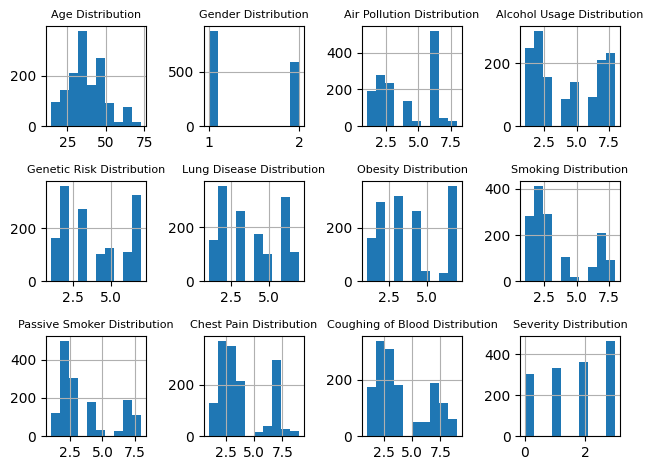

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a histogram
def draw_histograms(df, variables, n_rows, n_cols):
  fig = plt.figure()
  for i, var_name in enumerate(variables):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    df[var_name].hist(bins = 10, ax = ax)
    ax.set_title(var_name + " Distribution")
    ax.title.set_size(8)
  fig.tight_layout()
  plt.show()

draw_histograms(df, df.columns, 3, 4)

**Implement K-NN with Scikit-Learn**

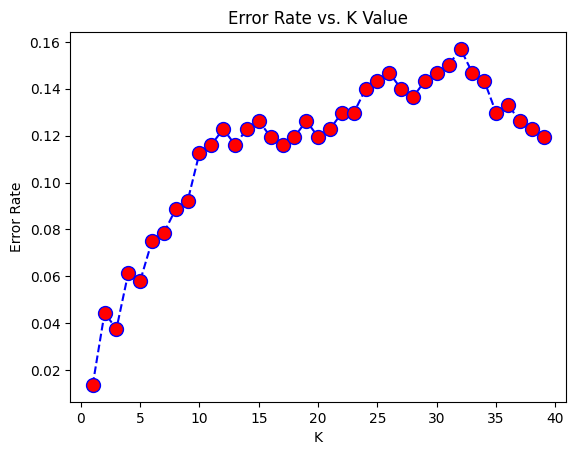

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Preprocess data
le = LabelEncoder()

# Split data into features and label
## Features: Age	Gender	Air Pollution	Alcohol Usage	Genetic Risk	Lung Disease
##           Obesity	Smoking	Passive Smoker	Chest Pain	Coughing of Blood
## Label:    Severity
X = df[['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
        'Lung Disease','Obesity','Smoking','Passive Smoker','Chest Pain',
        'Coughing of Blood']]
y = df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------
# Check error rate for k = 1 to 40
error_rate = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan')
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

# Plot line graph of error rate
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
# ----------

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Preprocess data
le = LabelEncoder()

# Split data into features and label
## Features: Age	Gender	Air Pollution	Alcohol Usage	Genetic Risk	Lung Disease
##           Obesity	Smoking	Passive Smoker	Chest Pain	Coughing of Blood
## Label:    Severity
X = df[['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
        'Lung Disease','Obesity','Smoking','Passive Smoker','Chest Pain',
        'Coughing of Blood']]
y = df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'manhattan')   # Set K = 1 (lowest error rate)
knn.fit(X_train, y_train)

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['Severity'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred, labels = classes), annot = True,
            fmt = 'g', xticklabels = classes, yticklabels = classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature: 0, Score: 0.01962
Feature: 1, Score: 0.01553
Feature: 2, Score: 0.02765
Feature: 3, Score: 0.01041
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00324
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000


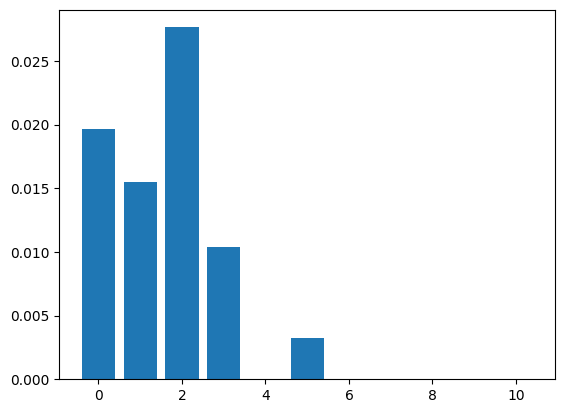

In [ ]:
# Permutation feature importance with K-NN for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# Fit the model
results = permutation_importance(knn, X_train, y_train, scoring = 'accuracy')

importance = results.importances_mean

for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.01867
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.14353
Feature: 3, Score: 0.08166
Feature: 4, Score: 0.06685
Feature: 5, Score: 0.00201
Feature: 6, Score: 0.12236
Feature: 7, Score: 0.05388
Feature: 8, Score: 0.05223
Feature: 9, Score: 0.05636
Feature: 10, Score: 0.40244


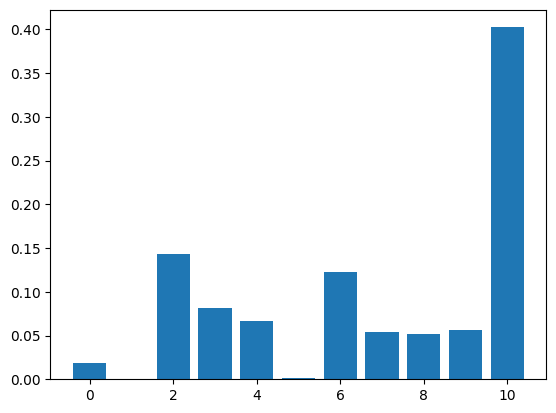

In [31]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()